In [117]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [125]:
df_path = '../../data/whisper-small-runs.csv'
df = pd.read_csv(df_path)
# only looking at first 10 epochs
df = df[(df['epoch'].isna()) | (df['epoch']<11)]
df.head()

C:\Users\marks\AppData\Local\Temp\ipykernel_19484\3805254241.py:2: DtypeWarning: Columns (5,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(df_path)


,index,step,tag,value,experiment_name,date,checkpoint,csv_name,preds_name,lid_loss_alpha,LoRA,lang_prompt,train_lang_token,embedding_distance_regularization_type,distance_regularization_lambda,ewc_lambda,lm_beta,lm_alpha,beam,epoch
0,0.0,0,eval/tira_eval-en+sw_cer,0.511096,whisper-small-tira,1900-02-09 04:05:01,NaN,NaN,NaN,NaN,False,-1,False,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.0,1341,eval/tira_eval-en+sw_cer,0.736247,whisper-small-tira,1900-02-09 04:05:01,NaN,NaN,NaN,NaN,False,-1,False,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2.0,2682,eval/tira_eval-en+sw_cer,0.692670,whisper-small-tira,1900-02-09 04:05:01,NaN,NaN,NaN,NaN,False,-1,False,NaN,NaN,NaN,NaN,NaN,NaN,2
3,3.0,4023,eval/tira_eval-en+sw_cer,0.765299,whisper-small-tira,1900-02-09 04:05:01,NaN,NaN,NaN,NaN,False,-1,False,NaN,NaN,NaN,NaN,NaN,NaN,3
4,4.0,5364,eval/tira_eval-en+sw_cer,0.819973,whisper-small-tira,1900-02-09 04:05:01,NaN,NaN,NaN,NaN,False,-1,False,NaN,NaN,NaN,NaN,NaN,NaN,4


In [126]:
df['experiment_name'].unique()

array(['whisper-small-tira', 'whisper-small-tira-all-clean',
       'whisper-small-tira-all-clean-ewc-lambda-1',
       'whisper-small-tira-all-clean-lid-alpha-0.2',
       'whisper-small-tira-all-clean-lid-alpha-0.2-ewc-lambda-1',
       'whisper-small-tira-all-long-lid-alpha-0.2-ewc-lambda-1',
       'whisper-small-tira-eng', 'whisper-small-tira-eng-50pct',
       'whisper-small-tira-eng-50pct-ewc-lambda-1',
       'whisper-small-tira-eng-50pct-lid-alpha-0.2',
       'whisper-small-tira-eng-50pct-lid-alpha-0.2-ewc-lambda-1',
       'whisper-small-tira-eng-cs-clean',
       'whisper-small-tira-eng-cs-clean-ewc-lambda-1',
       'whisper-small-tira-eng-cs-clean-lid-alpha-0.2',
       'whisper-small-tira-eng-cs-clean-lid-alpha-0.2-ewc-lambda-1',
       'whisper-small-tira-eng-cs-long',
       'whisper-small-tira-eng-cs-long-ewc-lambda-1',
       'whisper-small-tira-eng-cs-long-lid-alpha-0.2',
       'whisper-small-tira-eng-cs-long-lid-alpha-0.2-ewc-lambda-1',
       'whisper-small-tira-

In [127]:
# get more detailed colnames
get_metric = lambda s: 'cer' if 'cer' in s else 'wer' if 'wer' in s else ''
df['metric']=df['tag'].apply(get_metric)
# df.loc[df['tag'].str.contains('test'),'metric']=''
df['metric'].value_counts()

metric
       74326
cer     3883
wer     3883
Name: count, dtype: int64

In [132]:
unique_datasets = ['fl_en', 'HH20210312', 'HH20210913', 'tira-clean-split', 'sasoc-cs', 'sasoc-zul', 'sasoc-en', 'nchlt_zul', 'nchlt_eng', 'tira_cs']

def get_dataset(s):
    for dataset in unique_datasets:
        if dataset in s:
            return dataset


df['dataset']=df['tag'].apply(get_dataset)
df['dataset'].value_counts()

dataset
sasoc-cs     1080
fl_en         792
nchlt_zul     312
Name: count, dtype: int64

# Tabulate baseline metrics

In [134]:
baseline_mask = df['experiment_name']=='whisper-small'
df['experiment_name'].unique()

array(['whisper-small-tira', 'whisper-small-tira-all-clean',
       'whisper-small-tira-all-clean-ewc-lambda-1',
       'whisper-small-tira-all-clean-lid-alpha-0.2',
       'whisper-small-tira-all-clean-lid-alpha-0.2-ewc-lambda-1',
       'whisper-small-tira-all-long-lid-alpha-0.2-ewc-lambda-1',
       'whisper-small-tira-eng', 'whisper-small-tira-eng-50pct',
       'whisper-small-tira-eng-50pct-ewc-lambda-1',
       'whisper-small-tira-eng-50pct-lid-alpha-0.2',
       'whisper-small-tira-eng-50pct-lid-alpha-0.2-ewc-lambda-1',
       'whisper-small-tira-eng-cs-clean',
       'whisper-small-tira-eng-cs-clean-ewc-lambda-1',
       'whisper-small-tira-eng-cs-clean-lid-alpha-0.2',
       'whisper-small-tira-eng-cs-clean-lid-alpha-0.2-ewc-lambda-1',
       'whisper-small-tira-eng-cs-long',
       'whisper-small-tira-eng-cs-long-ewc-lambda-1',
       'whisper-small-tira-eng-cs-long-lid-alpha-0.2',
       'whisper-small-tira-eng-cs-long-lid-alpha-0.2-ewc-lambda-1',
       'whisper-small-tira-

# Line plots

In [91]:
# so we can compare no LID loss to using LID loss
df['lid_loss_alpha']=df['lid_loss_alpha'].fillna(0)
df['ewc_lambda']=df['ewc_lambda'].fillna(0)

In [92]:
df['ewc']=df['ewc_lambda']>0
df['lid_loss']=df['lid_loss_alpha']>0
df['regularization']='none'
df.loc[df['ewc'], 'regularization']='ewc'
df.loc[df['lid_loss'], 'regularization']='lid_loss'
df.loc[df['ewc'] & df['lid_loss'], 'regularization']='ewc+lid_loss'

In [93]:
df['train_data']='tira'
df.loc[df['experiment_name'].str.contains('tira-eng'), 'train_data']='tira-eng'
df.loc[df['experiment_name'].str.contains('tira-eng-50pct'), 'train_data']='tira-eng-50pct'
df.loc[df['experiment_name'].str.contains('tira-eng-cs'), 'train_data']='misc'
df.loc[df['experiment_name'].str.contains('tira-eng-cs-20-80-small'), 'train_data']='tira-eng-cs-20-80-small'
df.loc[df['experiment_name'].str.contains('tira-eng-cs-20-80-large'), 'train_data']='tira-eng-cs-20-80-large'
df.loc[df['experiment_name'].str.contains('tira-eng-cs-50-50-large'), 'train_data']='tira-eng-cs-50-50'
df.loc[df['experiment_name'].str.contains('tira-eng-cs-clean'), 'train_data']='tira-eng-cs-clean'
df.loc[df['experiment_name'].str.contains('tira-eng-cs-long'), 'train_data']='tira-eng-cs-long'
df.loc[df['experiment_name'].str.contains('tira-all'), 'train_data']='tira-all'
df.loc[df['experiment_name'].str.contains('tira-all-clean'), 'train_data']='tira-all-clean'
df.loc[df['experiment_name'].str.contains('tira-all-long'), 'train_data']='tira-all-long'

df.loc[df['experiment_name'].str.contains('zulu'), 'train_data']='zulu'
df.loc[df['experiment_name'].str.contains('zulu-swahili-eng'), 'train_data']='zulu+eng'
df.loc[df['experiment_name'].str.contains('zulu-swahili-eng-50pct'), 'train_data']='zulu+eng-50pct'
df.loc[df['experiment_name'].str.contains('zulu-eng-cs'), 'train_data']='zulu-eng-cs'
df.loc[df['experiment_name'].str.contains('zulu-eng-all'), 'train_data']='zulu-eng-all'

df['train_data'].value_counts()

train_data
zulu-eng-cs          26006
zulu+eng             25802
zulu                 13556
tira                 10850
zulu-eng-all          8942
tira-eng-cs-clean     8366
tira-eng-cs-long      8016
zulu+eng-50pct        8016
tira-all-clean        7986
tira-eng              6824
tira-eng-50pct         520
tira-all-long          170
Name: count, dtype: int64

In [94]:
# set whisper baseline metrics as epoch=0


In [95]:
df.loc[
    df['experiment_name'].str.contains('tira')&df['tag'].str.contains('eval')&df['dataset'].isna(),
    'dataset'
] = 'tira-cs'
df['dataset'].value_counts()

dataset
tira-cs      38889
sasoc-cs      2520
fl_en         2052
nchlt_zul     1572
Name: count, dtype: int64

In [96]:
df.loc[
    (df['train_data']=='zulu-eng-all')&df['tag'].str.contains('eval')&df['dataset'].isna(),
    'dataset'
] = 'sasoc-cs'
df['dataset'].value_counts()

dataset
tira-cs      38889
sasoc-cs     11225
fl_en         2052
nchlt_zul     1572
Name: count, dtype: int64

In [97]:
df=df.sort_values('step')
for experiment in df['experiment_name'].unique():
    for tag in df['tag'].unique():
        if 'loss' not in tag:
            continue
        loss_mask = df['tag']==tag
        experiment_mask = df['experiment_name']==experiment
        loss_diff = np.diff(df.loc[experiment_mask&loss_mask, 'value'])
        loss_diff = np.insert(loss_diff, 0, 0)
        df.loc[experiment_mask&loss_mask, 'loss_diff']=loss_diff
df.head()


,index,step,tag,value,experiment_name,date,checkpoint,csv_name,preds_name,lid_loss_alpha,...,lm_alpha,beam,epoch,metric,dataset,ewc,lid_loss,regularization,train_data,loss_diff
0,0.0,0,eval/tira_eval-en+sw_cer,0.511096,whisper-small-tira,1900-02-09 04:05:01,NaN,NaN,NaN,0.0,...,NaN,NaN,0,cer,tira-cs,False,False,none,tira,NaN
2817,11.0,0,eval/tira_eval-en+sw_loss,1.923962,whisper-small-tira-eng-lid-alpha-0.2-ewc-lambda-1,1900-02-12 22:22:25,NaN,NaN,NaN,0.2,...,NaN,NaN,0,,tira-cs,True,True,ewc+lid_loss,tira-eng,0.0
2828,22.0,0,eval/tira_eval-en+sw_runtime,16.558599,whisper-small-tira-eng-lid-alpha-0.2-ewc-lambda-1,1900-02-12 22:22:25,NaN,NaN,NaN,0.2,...,NaN,NaN,0,,tira-cs,True,True,ewc+lid_loss,tira-eng,NaN
2839,33.0,0,eval/tira_eval-en+sw_samples_per_second,4.771000,whisper-small-tira-eng-lid-alpha-0.2-ewc-lambda-1,1900-02-12 22:22:25,NaN,NaN,NaN,0.2,...,NaN,NaN,0,,tira-cs,True,True,ewc+lid_loss,tira-eng,NaN
2850,44.0,0,eval/tira_eval-en+sw_steps_per_second,0.604000,whisper-small-tira-eng-lid-alpha-0.2-ewc-lambda-1,1900-02-12 22:22:25,NaN,NaN,NaN,0.2,...,NaN,NaN,0,,tira-cs,True,True,ewc+lid_loss,tira-eng,NaN


In [98]:
df.loc[
    (df['experiment_name'].str.contains('tira'))&
    ((~df['csv_name'].isna())|(~df['preds_name'].isna())),
    'dataset'
]='tira-cs'
df.loc[
    (df['experiment_name'].str.contains('zulu'))&
    ((~df['csv_name'].isna())|(~df['preds_name'].isna())),
    'dataset'
]='sasoc-cs'

In [99]:
df[df['tag']=='eval_wer_processed']

,index,step,tag,value,experiment_name,date,checkpoint,csv_name,preds_name,lid_loss_alpha,...,lm_alpha,beam,epoch,metric,dataset,ewc,lid_loss,regularization,train_data,loss_diff
24946,NaN,144,eval_wer_processed,0.658779,whisper-small-tira-eng-cs-clean-lid-alpha-0.2,NaN,/mnt/LocalStorage/mjsimmons/whisper-small-tira...,whisper-small-tira-eng-cs-clean-lid-alpha-0.2/...,NaN,0.2,...,NaN,NaN,1,wer,tira-cs,False,True,lid_loss,tira-eng-cs-clean,NaN
23036,NaN,144,eval_wer_processed,0.647805,whisper-small-tira-eng-cs-clean-ewc-lambda-1,NaN,/mnt/LocalStorage/mjsimmons/whisper-small-tira...,whisper-small-tira-eng-cs-clean-ewc-lambda-1/eval,NaN,0.0,...,NaN,NaN,1,wer,tira-cs,True,False,ewc,tira-eng-cs-clean,NaN
21126,NaN,144,eval_wer_processed,0.649177,whisper-small-tira-eng-cs-clean,NaN,/mnt/LocalStorage/mjsimmons/whisper-small-tira...,whisper-small-tira-eng-cs-clean/eval,NaN,0.0,...,NaN,NaN,1,wer,tira-cs,False,False,none,tira-eng-cs-clean,NaN
26856,NaN,144,eval_wer_processed,0.658779,whisper-small-tira-eng-cs-clean-lid-alpha-0.2-...,NaN,/mnt/LocalStorage/mjsimmons/whisper-small-tira...,whisper-small-tira-eng-cs-clean-lid-alpha-0.2-...,NaN,0.2,...,NaN,NaN,1,wer,tira-cs,True,True,ewc+lid_loss,tira-eng-cs-clean,NaN
21127,NaN,288,eval_wer_processed,0.615226,whisper-small-tira-eng-cs-clean,NaN,/mnt/LocalStorage/mjsimmons/whisper-small-tira...,whisper-small-tira-eng-cs-clean/eval,NaN,0.0,...,NaN,NaN,2,wer,tira-cs,False,False,none,tira-eng-cs-clean,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40235,NaN,24150,eval_wer_processed,0.551783,whisper-small-tira-eng-lid-alpha-0.2-ewc-lambda-1,NaN,/mnt/LocalStorage/mjsimmons/whisper-small-tira...,whisper-small-tira-eng-lid-alpha-0.2-ewc-lambd...,NaN,0.2,...,NaN,NaN,10,wer,tira-cs,True,True,ewc+lid_loss,tira-eng,NaN
36415,NaN,24150,eval_wer_processed,0.540466,whisper-small-tira-eng-ewc-lambda-1,NaN,/mnt/LocalStorage/mjsimmons/whisper-small-tira...,whisper-small-tira-eng-ewc-lambda-1/eval,NaN,0.0,...,NaN,NaN,10,wer,tira-cs,True,False,ewc,tira-eng,NaN
17315,NaN,25590,eval_wer_processed,0.471879,whisper-small-tira-all-clean-lid-alpha-0.2,NaN,/mnt/LocalStorage/mjsimmons/whisper-small-tira...,whisper-small-tira-all-clean-lid-alpha-0.2/eval,NaN,0.2,...,NaN,NaN,10,wer,tira-cs,False,True,lid_loss,tira-all-clean,NaN
19225,NaN,25590,eval_wer_processed,0.468793,whisper-small-tira-all-clean-lid-alpha-0.2-ewc...,NaN,/mnt/LocalStorage/mjsimmons/whisper-small-tira...,whisper-small-tira-all-clean-lid-alpha-0.2-ewc...,NaN,0.2,...,NaN,NaN,10,wer,tira-cs,True,True,ewc+lid_loss,tira-all-clean,NaN


# EWC

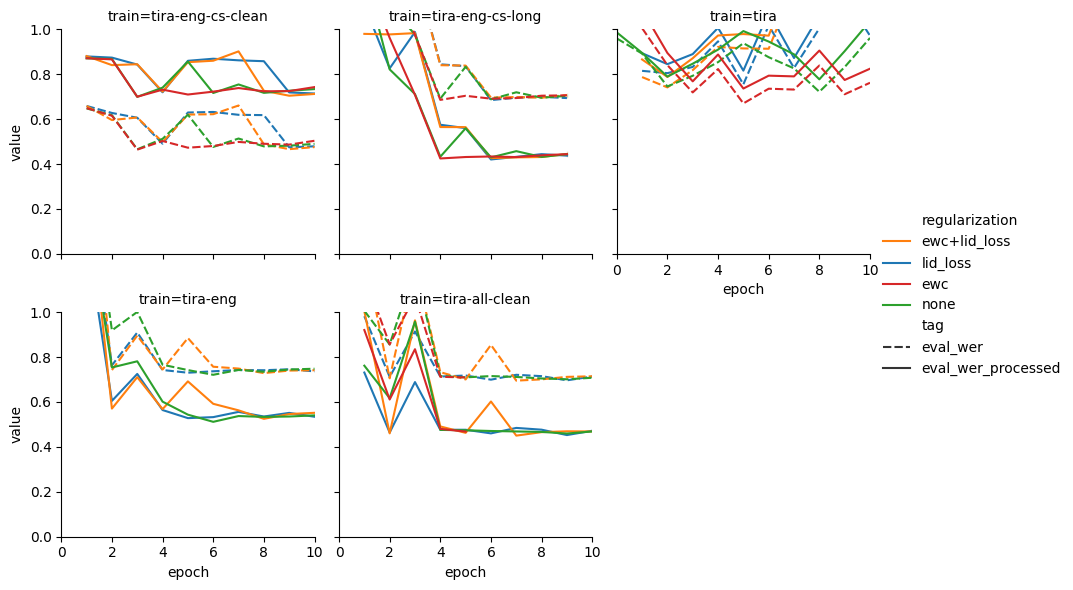

In [100]:
df['beam']=df['beam'].fillna(0).astype(float)
df['lm_alpha']=df['lm_alpha'].astype(str)
g = sb.FacetGrid(
    df[
        # (df['experiment_name'].str.contains('zulu')) &
        # ~(df['experiment_name'].str.contains('zulu-swahili-eng')) &
        (df['experiment_name'].str.contains('tira')) &
        # (~df['train_data'].str.contains('20-80'))&
        # (~df['train_data'].str.contains('misc'))&
        # (df['train_data'].str.contains('zulu-eng'))&
        # (df['train_data']!='tira-all')&
        # (df['lang_prompt']=='swahili') &
        # (df['lang_prompt']=='croatian')&
        # (df['dataset'].isin(['fl_en', 'tira-clean-split', 'sasoc-cs', 'nchlt_zul'])) &
        (df['dataset'].isin(['sasoc-cs', 'tira-cs'])) &
        (df['ewc_lambda'].isin([0,1])) &
        (df['lid_loss_alpha'].isin([0,0.2])) &
        # (df['beam']==2)&
        (df['beam']==0)&
        (~df['csv_name'].isna())&
        # (df['pred_name'].isna())&
        # (df['regularization']=='none')&
        # (df['tag'].str.contains('loss'))
        # (df['tag']=='train/loss')
        (df['tag'].isin(['eval_wer', 'eval_wer_processed']))
        # (df['metric']!='')
        # (df['LoRA'])
    ],
    # col='ewc_lambda',
    col='train_data',
    col_wrap=3,
    # row='lm_alpha',
    # col='lid_loss_alpha',
    # row='beam',
    # row='dataset',
    # sharey=False,
)
palette_map= {
    key: color for key, color in
    zip(['lid_loss', 'none', 'ewc', 'ewc+lid_loss'], sb.color_palette('husl',4))
}
g.map_dataframe(
    sb.lineplot,
    x='epoch',
    # x='step',
    y='value',
    # y='loss_diff',
    # hue='lid_loss_alpha',
    hue='regularization',
    # palette=palette_map,
    # hue='ewc_lambda',
    # errorbar=None,
    legend='full',
    style='tag',
    # style='tag',
)
# g.set_titles('eval={row_name}, train={col_name}')
g.set_titles('train={col_name}')
g.add_legend()
# g.set_title('Performance on English while decoding as Yoruba')
g.set(ylim=(0,1))
g.set(xlim=(0,10))
plt.show()

# Make table showing baseline and final test results: overall & lang specific

In [101]:
tira_metrics = []
for metric in ['_wer_processed', '_cer_processed']:
    tira_metrics.append('test'+metric)
for metric in ['_hit_rate_processed', '_char_hit_rate_processed']:
    for lang in ['tira', 'eng']:
        tira_metrics.append(f"test_{lang}{metric}")

df.loc[
    (df['dataset']=='tira-cs')&
    (df['tag'].isin(tira_metrics))
    # (df['tag'].str.contains('test'))
].pivot_table(
    columns='tag', index=['train_data', 'regularization', 'epoch'], values='value'
)

tag                                     test_cer_processed  \
train_data        regularization epoch                       
tira              ewc            5                0.267496   
                  ewc+lid_loss   8                0.279200   
                  lid_loss       2                0.269579   
                  none           2                0.259751   
tira-all-clean    ewc+lid_loss   7                0.355503   
                  lid_loss       9                0.344250   
                  none           9                0.352273   
tira-eng          ewc            6                0.298371   
                  none           8                0.314451   
tira-eng-cs-clean ewc            3                0.322405   
                  none           3                0.322995   

tag                                     test_eng_char_hit_rate_processed  \
train_data        regularization epoch                                     
tira              ewc            5                              0.787492   
                  ewc+lid_loss   8                              0.777706   
                  lid_loss       2                              0.756951   
                  none           2                              0.772159   
tira-all-clean    ewc+lid_loss   7                              0.863563   
                  lid_loss       9                              0.864316   
                  none           9                              0.870785   
tira-eng          ewc            6                              0.862375   
                  none           8                              0.864151   
tira-eng-cs-clean ewc            3                              0.868159   
                  none           3                              0.868200   

tag                                     test_eng_hit_rate_processed  \
train_data        regularization epoch                                
tira              ewc            5                         0.701148   
                  ewc+lid_loss   8                         0.693624   
                  lid_loss       2                         0.670256   
                  none           2                         0.688070   
tira-all-clean    ewc+lid_loss   7                         0.788717   
                  lid_loss       9                         0.789507   
                  none           9                         0.796498   
tira-eng          ewc            6                         0.784876   
                  none           8                         0.787050   
tira-eng-cs-clean ewc            3                         0.797941   
                  none           3                         0.797830   

tag                                     test_tira_char_hit_rate_processed  \
train_data        regularization epoch                                      
tira              ewc            5                               0.787697   
                  ewc+lid_loss   8                               0.783775   
                  lid_loss       2                               0.767198   
                  none           2                               0.772671   
tira-all-clean    ewc+lid_loss   7                               0.780148   
                  lid_loss       9                               0.777302   
                  none           9                               0.778428   
tira-eng          ewc            6                               0.755754   
                  none           8                               0.759485   
tira-eng-cs-clean ewc            3                               0.734625   
                  none           3                               0.734733   

tag                                     test_tira_hit_rate_processed  \
train_data        regularization epoch                                 
tira              ewc            5                          0.337912   
                  ewc+lid_loss   8                          0.

In [102]:
tira_metrics

['test_wer_processed',
 'test_cer_processed',
 'test_tira_hit_rate_processed',
 'test_eng_hit_rate_processed',
 'test_tira_char_hit_rate_processed',
 'test_eng_char_hit_rate_processed']

In [103]:
df['csv_name'].unique()

array([nan, 'whisper-small-tira-eng-cs-clean-lid-alpha-0.2/eval',
       'whisper-small-tira-eng-cs-clean-ewc-lambda-1/eval',
       'whisper-small-tira-eng-cs-clean-lid-alpha-0.2-ewc-lambda-1/eval',
       'whisper-small-tira-eng-cs-clean/eval',
       'whisper-small-zulu-swahili-eng-50pct/eval',
       'whisper-small-zulu-swahili-eng-50pct-lid-alpha-0.2/eval',
       'whisper-small-zulu-swahili-eng-50pct-lid-alpha-0.2-ewc-lambda-1/eval',
       'whisper-small-zulu-swahili-eng-50pct-ewc-lambda-1/eval',
       'whisper-small-zulu-eng-cs-lid-alpha-0.2/eval',
       'whisper-small-zulu-eng-cs-ewc-lambda-1/eval',
       'whisper-small-zulu-eng-cs-lid-alpha-0.2-ewc-lambda-1/eval',
       'whisper-small-zulu-eng-cs/eval',
       'whisper-small-tira-eng-cs-long-ewc-lambda-1/eval',
       'whisper-small-tira-eng-cs-long-lid-alpha-0.2-ewc-lambda-1/eval',
       'whisper-small-tira-eng-cs-long-lid-alpha-0.2/eval',
       'whisper-small-tira-eng-cs-long/eval',
       'whisper-small-zulu-eng-all-

In [104]:
df.loc[
        (~df['preds_name'].isna()),
        'experiment_name'
].unique()

array(['whisper-small-tira-eng-cs-clean',
       'whisper-small-tira-eng-cs-clean-ewc-lambda-1',
       'whisper-small-tira', 'whisper-small-tira-lid-alpha-0.2',
       'whisper-small-tira-ewc-lambda-1',
       'whisper-small-tira-lid-alpha-0.2-ewc-lambda-1',
       'whisper-small-tira-eng-ewc-lambda-1',
       'whisper-small-tira-all-clean-lid-alpha-0.2-ewc-lambda-1',
       'whisper-small-tira-eng', 'whisper-small-tira-all-clean',
       'whisper-small-tira-all-clean-lid-alpha-0.2'], dtype=object)

In [105]:
df.loc[df['experiment_name']=='whisper-small-tira-ewc-lambda-1','metric'].unique()

array(['cer', '', 'wer'], dtype=object)

In [106]:
lang_metrics = []
for metric in ['cer', 'wer']:
    for lang in ['eng', 'tira', 'zulu', 'misc']:
        lang_metrics.append(f"{lang}_{metric}")
has_lang_metric = lambda s: any(m in s for m in lang_metrics)
no_lang_metric_mask = ~df['tag'].apply(has_lang_metric)
df.loc[(df['metric']!='')&no_lang_metric_mask,'tag'].unique()

array(['eval/tira_eval-en+sw_cer', 'eval/tira_eval-en+sw_wer',
       'eval/fl_en-en_wer', 'eval/cer', 'eval/fl_en-en_cer',
       'eval/sasoc-cs-en+sw_cer', 'eval/sasoc-cs-en+sw_wer', 'eval/wer',
       'eval/nchlt_zul_val-sw_cer', 'eval/nchlt_zul_val-sw_wer',
       'eval_cer', 'eval_cer_processed', 'eval_wer', 'eval_wer_processed',
       'test_wer', 'test_wer_processed', 'test_cer', 'test_cer_processed'],
      dtype=object)

In [116]:
zero_as_baseline = df.copy()
zero_as_baseline.loc[(df['epoch']==0)&(df['train_data'].str.contains('tira')),'train_data']='tira baseline'
zero_as_baseline.loc[(df['epoch']==0)&(df['train_data'].str.contains('zulu')),'train_data']='zulu baseline'
metric_cols = zero_as_baseline[
    # (df['metric']!='')&
    (df['epoch']<=10)&
    # (df['epoch']>1)&
    # (((~df['preds_name'].isna())|(~df['csv_name'].isna()))|(df['epoch']==0)) &
    (~(df['tag']).str.contains('test')) &
    # (~(df['tag']).str.contains('processed')) &
    (df['dataset'].isin(['sasoc-cs', 'tira-cs'])) &
    no_lang_metric_mask
].pivot_table(
    columns=['regularization'],
    values=['value'],
    index=['train_data', 'epoch', 'metric'],
    aggfunc=lambda x:x.min(),
).pivot_table(
    index=['train_data', 'epoch'],
    columns=['metric'],
).droplevel(
    axis=1,
    level=0
)
reg_names = ['none', 'ewc', 'lid_loss', 'ewc+lid_loss']
reg_dfs = []
for reg in reg_names:
    reg_df=metric_cols[reg]
    reg_df=reg_df.sort_values('wer')
    reg_df=reg_df.reset_index()
    reg_df=reg_df.rename_axis('', axis=1)
    # reg_df=reg_df[reg_df['epoch']>0]
    reg_df=reg_df.drop_duplicates(subset=['train_data'], keep='first')
    reg_df['regularization']=reg
    reg_dfs.append(reg_df)
reg_dfs = pd.concat(reg_dfs)
table=reg_dfs.melt(
    value_vars=['cer', 'wer', 'epoch'],
    var_name='var',
    id_vars=['train_data', 'regularization']
).sort_values(
    'train_data'
).pivot_table(
    columns=['regularization', 'var'],
    index='train_data'
)
table.columns.names=[None,'regularization',None]
table=table.droplevel(0,axis=1)
table=table.reset_index()
is_tira=table['train_data'].str.contains('tira')
table = pd.concat({'Tira': table[is_tira], 'Zulu': table[~is_tira]})
table=table.rename({
    'ewc': 'EWC',
    'lid_loss': 'LID loss',
    'none': 'Plain finetune',
    'ewc+lid_loss': 'EWC+LID loss',
    'train_data': 'Train dataset',
}, axis=1)
table['Train dataset']=table['Train dataset'].map({
    'tira': 'Mono',
    'tira-all-clean': 'All (short)',
    'tira-all-long': 'All (long)',
    'tira-eng': 'Biling',
    'tira-eng-50pct': 'Biling (50\\%)',
    'tira-eng-cs-clean': "CS (short)",
    'tira-eng-cs-long': "CS (long)",
    'tira baseline': 'Baseline',
    'zulu': "Mono",
    'zulu+eng': "Biling",
    'zulu+eng-50pct': "Biling (50\\%)",
    'zulu-eng-all': 'All',
    'zulu-eng-cs': 'CS',
    'zulu baseline': 'Baseline',
})

for column in table.columns:
    if column[1]=='epoch':
        table[column]=table[column].astype(int)
    elif column[1]=='':
        pass
    elif column[1] in ('wer', 'cer'):
        table[column]=table[column].apply(lambda n:f"{n:.2f}")
for language in ['Tira', 'Zulu']:
    is_language = table.index.get_level_values(0)==language
    for column in table.columns:
        if column[1] in ('wer', 'cer'):
            min_idx = table.loc[language,column].astype(float).idxmin()
            min_val = table.at[(language,min_idx),column]
            table.loc[(is_language)&(table[column]==min_val),column]=r'\textbf{'+min_val+r'}'
split_bf = lambda s:s.removeprefix(r'\textbf{').removesuffix(r'}')
def italicize_min_per_row(row):
    if row['Train dataset'].item() == 'Baseline':
        return row
    cer = row.index.get_level_values(1)=='cer'
    min_cer_idx = row[cer].apply(split_bf).astype(float).idxmin()
    min_cer_value=row[min_cer_idx]
    row[cer&(row==min_cer_value)]=r'\textit{'+min_cer_value+r'}'

    wer = row.index.get_level_values(1)=='wer'
    min_wer_idx = row[wer].apply(split_bf).astype(float).idxmin()
    min_wer_value=row[min_wer_idx]
    row[wer&(row==min_wer_value)]=r'\textit{'+min_wer_value+r'}'
    return row
table=table.apply(italicize_min_per_row, axis=1)
table=table.loc[:,table.columns.get_level_values(1)!='epoch']
table=pd.concat({
    'Tira':table.loc['Tira'].set_index('Train dataset'),
    'Zulu':table.loc['Zulu'].set_index('Train dataset'),
})
table.columns.names=None,None
ordered_cols = []
for reg in ['Plain finetune', 'EWC', 'LID loss', 'EWC+LID loss']:
    for metric in ['wer', 'cer']:
        ordered_cols.append((reg,metric))
table=table[ordered_cols]
ordered_rows = []
for ds in ['Baseline', 'Mono', 'Biling', 'Biling (50\%)', 'CS (short)', 'CS (long)', 'All (short)', 'All (long)']:
# for ds in ['Baseline', 'Mono', 'All (short)', 'CS', 'Biling']:
    ordered_rows.append(('Tira', ds))
for ds in ['Baseline', 'Mono', 'Biling', 'Biling (50\%)', 'CS', 'All']:
    ordered_rows.append(('Zulu', ds))
table=table.loc[ordered_rows]
table

Plain finetune                 \
                                       wer            cer   
     Train dataset                                          
Tira Baseline                         0.64           0.51   
     Mono                             0.74           0.67   
     Biling                           0.73           0.53   
     Biling (50\%)           \textit{0.71}           0.49   
     CS (short)              \textit{0.46}  \textit{0.35}   
     CS (long)               \textbf{0.43}  \textbf{0.34}   
     All (short)                      0.46           0.35   
     All (long)                        nan            nan   
Zulu Baseline                         1.49           0.92   
     Mono                             0.84           0.47   
     Biling                           0.58           0.28   
     Biling (50\%)                    0.63  \textit{0.32}   
     CS                               0.46           0.22   
     All            \textit{\textbf{0.39}}  \textbf{0.18}   

                                       EWC                          \
                                       wer                     cer   
     Train dataset                                                   
Tira Baseline                         0.64                    0.51   
     Mono                    \textit{0.67}           \textit{0.58}   
     Biling                  \textit{0.51}           \textit{0.45}   
     Biling (50\%)           \textit{0.71}           \textit{0.48}   
     CS (short)                       0.47           \textit{0.35}   
     CS (long)      \textit{\textbf{0.42}}  \textit{\textbf{0.33}}   
     All (short)                      0.47                    0.36   
     All (long)                        nan                     nan   
Zulu Baseline                         1.49                    0.92   
     Mono                    \textit{0.66}           \textit{0.34}   
     Biling                           0.70                    0.41   
     Biling (50\%)                    0.62                    0.35   
     CS                               0.44                    0.21   
     All            \textit{\textbf{0.39}}           \textbf{0.18}   

                                  LID loss                          \
                                       wer                     cer   
     Train dataset                                                   
Tira Baseline                         0.64                    0.51   
     Mono                             0.76                    0.64   
     Biling                           0.53           \textit{0.45}   
     Biling (50\%)           \textit{0.71}           \textit{0.48}   
     CS (short)                       0.47           \textit{0.35}   
     CS (long)               \textbf{0.43}  \textit{\textbf{0.33}}   
     All (short)             \textit{0.45}                    0.34   
     All (long)                        nan                     nan   
Zulu Baseline                         1.49                    0.92   
     Mono                             0.70           \textit{0.34}   
     Biling                           0.56           \textit{0.26}   
     Biling (50\%)           \textit{0.61}                    0.33   
     CS                               0.45                    0.21   
     All            \textit{\textbf{0.39}}  \textit{\textbf{0.17}}   

                              EWC+LID loss                          
                                       wer                     cer  
     Train dataset                                                  
Tira Baseline                         0.64                    0.51  
     Mono                             0.72                    0.65  
     Biling                           0.53                    0.46  
     Biling (50\%)           \textit{0.71}           \textit{0.48}  
     CS (short)                       0.47           \textit{0.35}  
     CS (long)      \textit{\textbf{0.42}}  \textit{\tex

In [108]:
df['train_data'].unique()

array(['tira', 'tira-eng', 'zulu', 'tira-eng-cs-long', 'tira-eng-50pct',
       'tira-all-clean', 'zulu-eng-all', 'zulu+eng', 'tira-eng-cs-clean',
       'tira-all-long', 'zulu-eng-cs', 'zulu+eng-50pct'], dtype=object)

In [109]:
with open('table.tex', 'w') as f:
    latex_str=table.to_latex(index=True, escape=False, sparsify=True, multirow=False)
    latex_str=latex_str.replace(r'\multicolumn{2}{r}', r'\multicolumn{2}{l}')
    latex_str=latex_str.replace('Zulu','\midrule\nisiZulu')
    f.write(latex_str)

# Lang specific metrics

In [110]:
df['tag'].unique()

array(['eval/tira_eval-en+sw_cer', 'eval/tira_eval-en+sw_loss',
       'eval/tira_eval-en+sw_runtime',
       'eval/tira_eval-en+sw_samples_per_second',
       'eval/tira_eval-en+sw_steps_per_second',
       'eval/tira_eval-en+sw_wer', 'train/epoch', 'eval/fl_en-en_wer',
       'eval/fl_en-en_steps_per_second',
       'eval/fl_en-en_samples_per_second', 'eval/fl_en-en_runtime',
       'eval/fl_en-en_loss', 'eval/cer', 'eval/loss', 'eval/runtime',
       'eval/fl_en-en_cer', 'eval/samples_per_second',
       'eval/sasoc-cs-en+sw_cer', 'eval/sasoc-cs-en+sw_wer',
       'eval/sasoc-cs-en+sw_steps_per_second', 'eval/wer',
       'eval/sasoc-cs-en+sw_samples_per_second',
       'eval/sasoc-cs-en+sw_runtime', 'eval/sasoc-cs-en+sw_loss',
       'eval/steps_per_second', 'eval/nchlt_zul_val-sw_cer',
       'eval/nchlt_zul_val-sw_runtime', 'eval/nchlt_zul_val-sw_wer',
       'eval/nchlt_zul_val-sw_steps_per_second',
       'eval/nchlt_zul_val-sw_loss',
       'eval/nchlt_zul_val-sw_samples_per_s